In [4]:
#import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Data set downloaded from https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

In [5]:
# load in data
heart = pd.read_csv("./data/heart.csv")
print(f"Dataset dimensions: {heart.shape}")
print(heart.head())

# define X and y
X = heart.drop('HeartDisease', axis=1) #every column but HeartDisease
y = heart['HeartDisease']

# split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Dataset dimensions: (918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Training set shape: (734, 11)
Testing set shape: (184, 11)


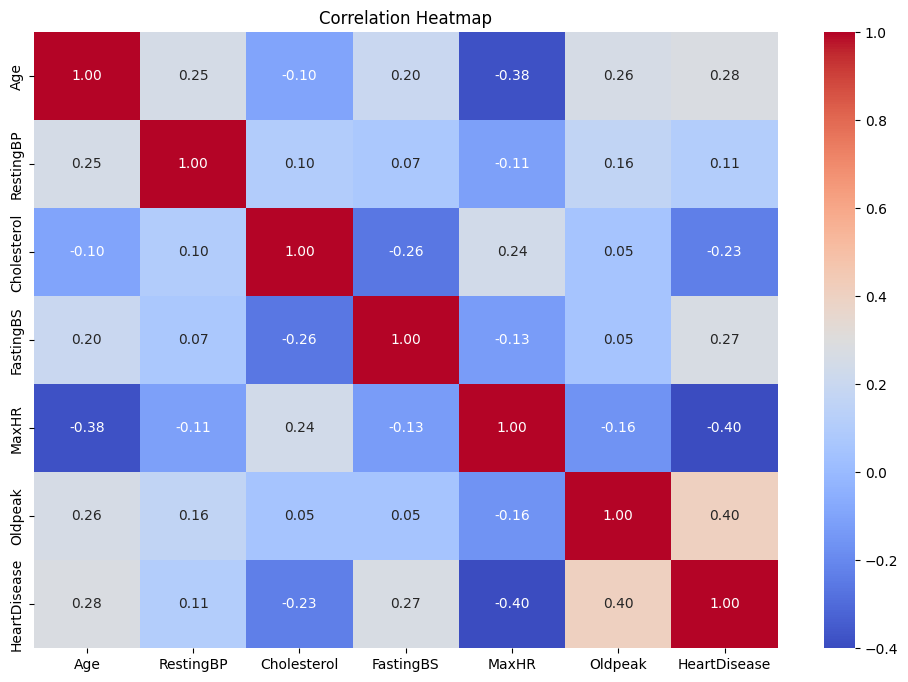

In [6]:
#### Data visualisation ####

# draw heatmap to see correlations between numeric variables
numeric_data = heart.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


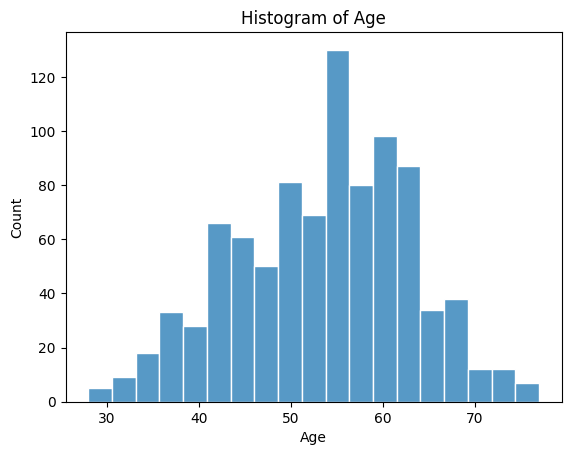

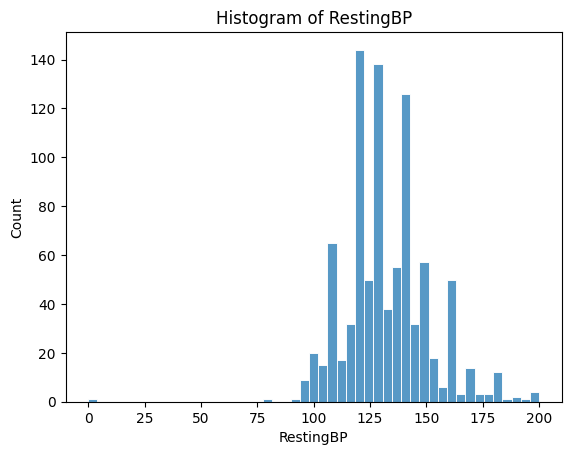

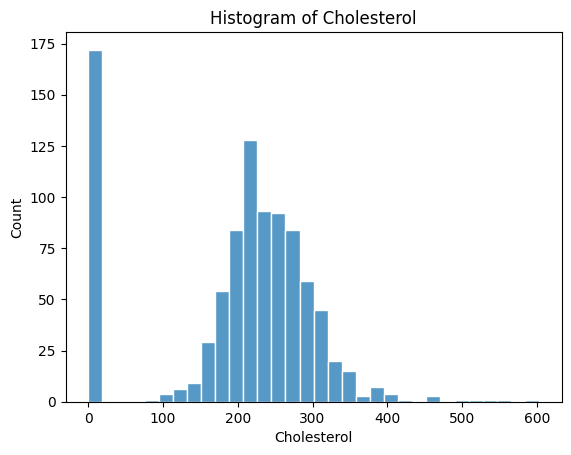

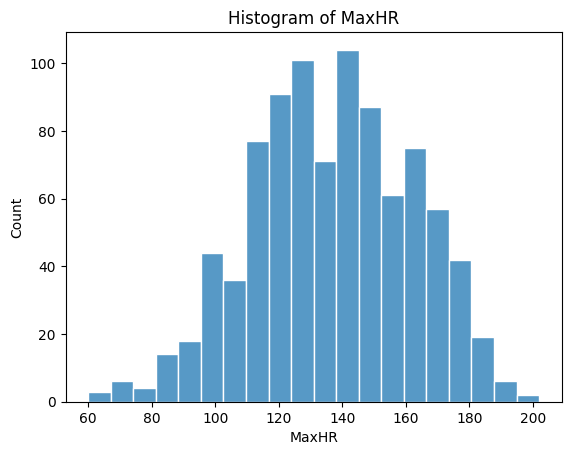

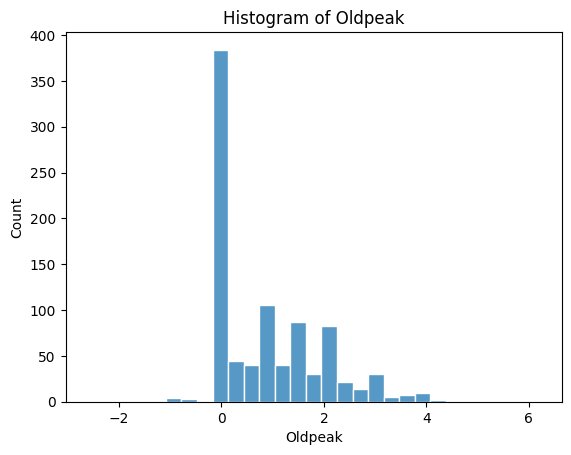

In [12]:
# draw histograms of continuous numeric varibles
hist_data = heart[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
for variable in hist_data.columns:
    ax = sns.histplot(hist_data[variable], edgecolor='white')
    ax.set_title(f"Histogram of {variable}")
    plt.show()

In [17]:
##### Data preprocessing ####

# create a selector to pick out numerical and categorical columns 
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# apply selector to data columns
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

# define preprocessors for each type of column
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

#combine into one preprocessor
preprocessor = make_column_transformer(
    (categorical_preprocessor, categorical_columns),
    (numerical_preprocessor, numerical_columns),
)



Logistic Regression Results:
               precision    recall  f1-score   support

       Normal       0.91      0.83      0.87        82
Heart Disease       0.87      0.93      0.90       102

     accuracy                           0.89       184
    macro avg       0.89      0.88      0.88       184
 weighted avg       0.89      0.89      0.89       184

Cross-validation scores: [0.88435374 0.87755102 0.84353741 0.83673469 0.80136986]
Mean CV accuracy: 0.8487 ± 0.0300


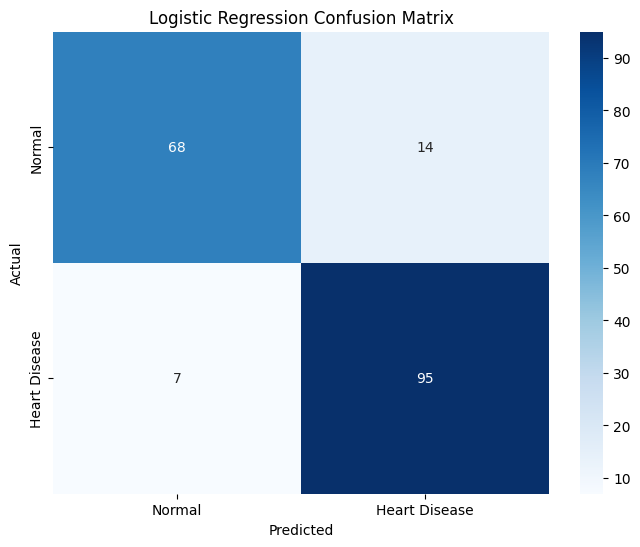

In [19]:
#### Logistic regression ####

# the pipeline applys preprocessing, then runs a logistic regression
model0 = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, random_state=1))

# fit the model to the training data
model0.fit(X_train, y_train)

# evaluate the logistic regression model
y_pred = model0.predict(X_test)
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Heart Disease']))

# cross validation
cv_scores = cross_val_score(model0, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# confustion matrix to visualise model accuracy
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Heart Disease'],
            yticklabels=['Normal', 'Heart Disease'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest results:
               precision    recall  f1-score   support

       Normal       0.91      0.87      0.89        82
Heart Disease       0.90      0.93      0.91       102

     accuracy                           0.90       184
    macro avg       0.90      0.90      0.90       184
 weighted avg       0.90      0.90      0.90       184

Cross-validation scores: [0.87755102 0.85034014 0.8707483  0.8707483  0.82191781]
Mean CV accuracy: 0.8583 ± 0.0203


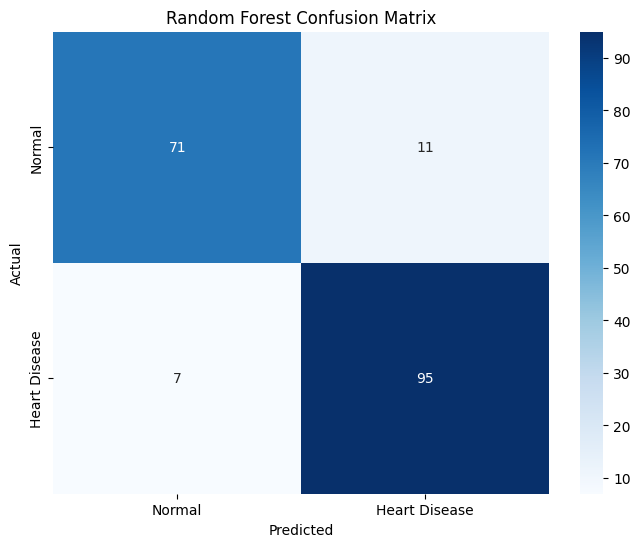

In [20]:
# Random forest model
model1= make_pipeline(preprocessor, RandomForestClassifier(n_estimators=1000, random_state=1))

# fit the model to the training data
model1.fit(X_train, y_train)

# evaluate the random forest model
y_pred = model1.predict(X_test)
print("\nRandom Forest results:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Heart Disease']))

# cross validation
cv_scores = cross_val_score(model1, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# confustion matrix to visualise model accuracy
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Heart Disease'],
            yticklabels=['Normal', 'Heart Disease'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


K nearest neighbors results:
               precision    recall  f1-score   support

       Normal       0.91      0.90      0.91        82
Heart Disease       0.92      0.93      0.93       102

     accuracy                           0.92       184
    macro avg       0.92      0.92      0.92       184
 weighted avg       0.92      0.92      0.92       184

Cross-validation scores: [0.88435374 0.86394558 0.87755102 0.84353741 0.83561644]
Mean CV accuracy: 0.8610 ± 0.0189


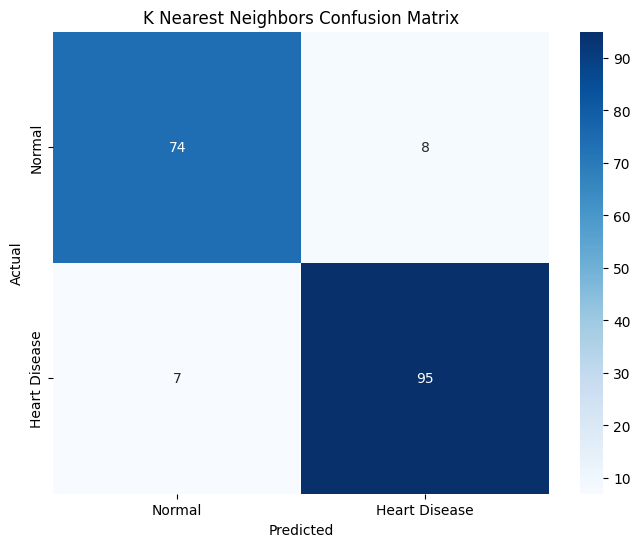

In [21]:
# K nearest neighbors model
model2= make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=9))

# fit the model to the training data
model2.fit(X_train, y_train)

# evaluate the random forest model
y_pred = model2.predict(X_test)
print("\nK nearest neighbors results:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Heart Disease']))

# cross validation
cv_scores = cross_val_score(model2, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# confustion matrix to visualise model accuracy
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Heart Disease'],
            yticklabels=['Normal', 'Heart Disease'])
plt.title('K Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()